<a href="https://colab.research.google.com/github/Phdbalogun/Capstone-project/blob/main/CAPSTONE_Student_Group_7882.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GENERATING AND ASSESSING CLIMATE DERIVATIVES FOR CONTROLLING AND MITIGATING RISKS IN INVESTMENT PORTFOLIOS**

##**GROUP MEMBERS**

***PHILIP AYODELE BALOGUN ***		phdbalogun@gmail.com

***PHENDULILE MANANA	***	 	mananalwenele16@gmail.com


##**PSEUDO CODE**

**Step 1:**

·Data Collection Adapt climate data archived from other websites such as NOAA, NASA, and ECMWF data.
· Put together the financial data for the securities that make up a portfolio (stocks, bonds, indices, etc.).
· Preprocess the data: Change climate data into understandable formats (e.g., converting temperatures into Celsius). Sync date and format of climate and financial datasets.

**Step 2:**

· Climate Risk Assessment Summarize climate data and descriptive statistics of mean, standard deviation of climate and major trends. Plot temperature data on graphs to observe a particular pattern. They should then identify climate volatility as a measure of systematic risk.


**Step 3:**

Design Derivative Choose the type of climate derivative it is to be, for example, the temperature-based call option or the catastrophe bond.
Define parameters for the derivative:

S: Average Temperature Currently (Current temperature index).
X: The threshold temperature of the above strike formula is also called strike temperature.
T: Time to maturity (in years).
r: Risk-free interest rate.
σ: Climate volatility.
 Implement a pricing formula: For options: Pricing of these derivatives can be done using Black-Scholes or any other model on derivatives. For catastrophe bonds: Organizations should incorporate either parametric or custom models.


**Step 4:**

· Ongoing climate change necessitates the modeling of future climate scenarios to guide the climate change mitigation plans.
· Generate a distribution of future temperatures using a normal distribution: Mean = Temperature of the area in the past.
· Standard deviation = Climate fluctuation. Compute derivative payoffs: If a call option: A Call option payoff Payoff=min⁡(Strike, Temperature)\text{Payoff} = \min(Strike, Temperature)Payoff=min(Strike,Temperature). Finally, approximate the expected payoff with the average of all the created simulations.


**Step 5:**

 Assessment of the integrated portfolio
 Define a sample portfolio with three assets:
·  Stocks: Distribute a higher amount, as a priority or an initial weight (for example 60%).
· Bonds: Distribute initial allocation (e.g., 30%), and all other decisions with respect to each module must correspond to principles of an ‘ideal architecture’.
· Climate Derivative: Set first weight proportion (e. g. 10%).
· Calculate portfolio metrics: Portfolio return = Σ ( Wi * Ri) Portfolio risk = Sum of individual risks weighted by portfolio’s exposure to each risk.
·Adjust portfolio weights to optimize risk-return characteristics: Boost derivative use if it leads to smaller total risk exposure on the portfolio.

**Step 6:**
· Visualization and Reporting Graph the daily and monthly simulated temperature distributions and the payoffs resulting from their derivative program.
·Illustrate the results of portfolio analysis (return against risk).
 Document findings: Derivative pricing results. Optimization trends and patterns of portfolio.


###**Step 1: Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


###**Step 2: Load and Prepare Data**

**Download Climate Data from Online Sources:**

    NOAA Climate Data: https://www.ncdc.noaa.gov/cdo-web/
    NASA EarthData: https://earthdata.nasa.gov/
    European Centre for Medium-Range Weather Forecasts (ECMWF): https://www.ecmwf.int/

In [ ]:
# Load climate data
climate_data = pd.read_csv('climate_data.csv')  # Replace with actual file path
financial_data = pd.read_csv('financial_data.csv')  # Replace with actual file path

# Preview data
print(climate_data.head())
print(financial_data.head())

# Data preprocessing
climate_data['Date'] = pd.to_datetime(climate_data['Date'])
financial_data['Date'] = pd.to_datetime(financial_data['Date'])

###**Step 3: Model Climate Risk**

In [ ]:
# Calculate rolling averages for temperature to detect trends
climate_data['Rolling_Temp'] = climate_data['Temperature'].rolling(window=30).mean()

# Visualize temperature trends
plt.plot(climate_data['Date'], climate_data['Rolling_Temp'])
plt.title('Temperature Trends')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

# Calculate standard deviations for volatility assessment
climate_volatility = climate_data['Temperature'].std()
print(f"Climate Volatility: {climate_volatility}")


###**Step 4: Design and Price a Climate Derivative**

In [ ]:
# Define Black-Scholes formula
def black_scholes(S, X, T, r, sigma):
    d1 = (np.log(S / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Parameters for the derivative
S = 30  # Current temperature index
X = 25  # Strike temperature
T = 1   # Time to maturity (in years)
r = 0.03  # Risk-free interest rate
sigma = climate_volatility  # Climate volatility as proxy for sigma

# Calculate derivative price
price = black_scholes(S, X, T, r, sigma)
print(f"Derivative Price: {price}")


###**Step 5: Back-Test Derivative Performance**

In [ ]:
# Simulate future temperatures
np.random.seed(42)
future_temps = np.random.normal(loc=climate_data['Temperature'].mean(), scale=climate_volatility, size=100)

# Calculate payoff for each scenario
payoffs = [max(temp - X, 0) for temp in future_temps]
expected_payoff = np.mean(payoffs)
print(f"Expected Payoff: {expected_payoff}")

# Visualize scenario outcomes
plt.hist(future_temps, bins=20, alpha=0.7, label='Simulated Temperatures')
plt.axvline(x=X, color='r', linestyle='--', label='Strike Temperature')
plt.title('Simulated Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()


###**Step 6: Portfolio Optimization**

In [ ]:
# Example: Adjust portfolio weights
assets = ['Stock', 'Bond', 'Derivative']
weights = np.array([0.6, 0.3, 0.1])  # Initial weights
returns = np.array([0.08, 0.03, expected_payoff])  # Annualized returns
risk = np.array([0.2, 0.1, sigma])  # Standard deviations

# Portfolio return and risk
portfolio_return = np.dot(weights, returns)
portfolio_risk = np.sqrt(np.dot(weights ** 2, risk ** 2))
print(f"Portfolio Return: {portfolio_return}, Portfolio Risk: {portfolio_risk}")

# Adjust weights for optimal risk-return
weights[2] += 0.05  # Increase derivative allocation
print(f"Adjusted Weights: {weights}")

**Part 1: NASA Climate Data Integration**

This part retrieves 10 years of daily climate data from NASA's POWER API.

NASA POWER Climate Data fetched successfully!
NASA 10-year climate data saved as 'nasa_10_year_climate_data.csv'.
        Date  Temperature (°C)
0 2013-01-01             21.10
1 2013-01-02             21.98
2 2013-01-03             21.92
3 2013-01-04             23.51
4 2013-01-05             22.62


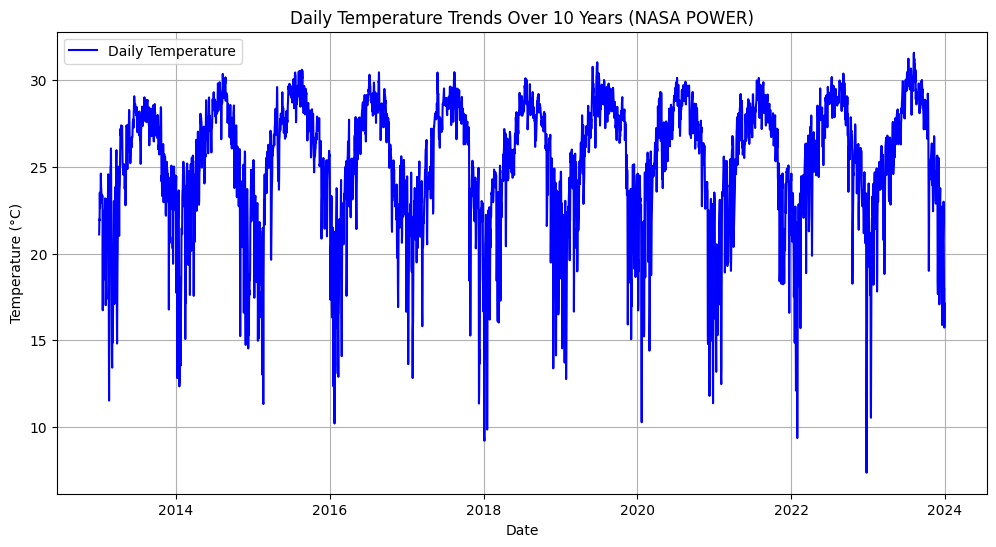

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# NASA POWER API for climate data (10-Year Simulation)
NASA_URL = "https://power.larc.nasa.gov/api/temporal/daily/point"
NASA_API_KEY = "gUQ1zKZQh5xwkdO4scV9RjmNSRE5pnkR3WaKAvBk"  # Your API Key

# Parameters for NASA POWER API
nasa_params = {
    "parameters": "T2M",  # Temperature at 2 meters
    "community": "AG",  # Agriculture community
    "longitude": -80.50,  # Longitude of the location
    "latitude": 25.80,  # Latitude of the location
    "start": "20130101",  # Start date (10 years ago)
    "end": "20231231",  # End date (current year)
    "format": "JSON",  # Response format
}

# Function to fetch NASA Climate Data
def fetch_nasa_power_data(url, params):
    response = requests.get(url, params=params)
    if response.status_code == 200:
        print("NASA POWER Climate Data fetched successfully!")
        return response.json()
    else:
        print(f"Error fetching NASA POWER data: {response.status_code}")
        return None

# Fetch the data
nasa_climate_data = fetch_nasa_power_data(NASA_URL, nasa_params)

# Process and Save Climate Data
if nasa_climate_data:
    # Extract temperature data
    temperature_data = nasa_climate_data.get("properties", {}).get("parameter", {}).get("T2M", {})

    # Convert JSON data to pandas DataFrame
    dates = list(temperature_data.keys())
    temperatures = list(temperature_data.values())
    climate_df = pd.DataFrame({"Date": dates, "Temperature (°C)": temperatures})
    climate_df["Date"] = pd.to_datetime(climate_df["Date"])  # Convert date column to datetime

    # Save as CSV
    climate_df.to_csv("nasa_10_year_climate_data.csv", index=False)
    print("NASA 10-year climate data saved as 'nasa_10_year_climate_data.csv'.")

    # Display a sample
    print(climate_df.head())

    # Plot temperature trends over 10 years
    plt.figure(figsize=(12, 6))
    plt.plot(climate_df["Date"], climate_df["Temperature (°C)"], color="blue", label="Daily Temperature")
    plt.title("Daily Temperature Trends Over 10 Years (NASA POWER)")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print("No climate data retrieved.")


**Scenario Analysis**

This part simulates future temperature trends based on a defined annual increase.

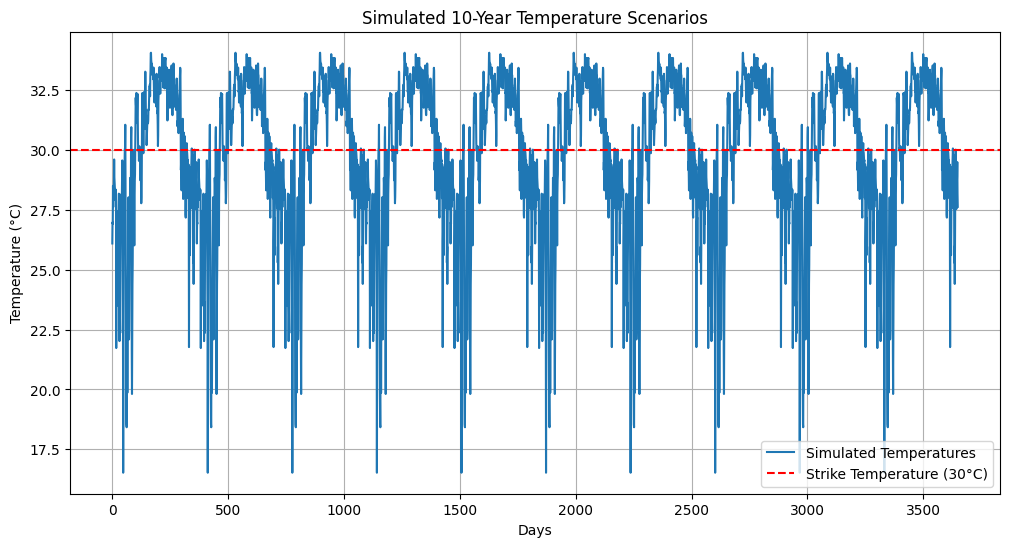

In [5]:
import numpy as np

# Function to simulate temperature scenarios
def simulate_climate_scenarios(data, annual_increase_rate, years):
    """
    Simulate temperature scenarios with a gradual annual increase over the given years.
    :param data: Array of initial temperature data.
    :param annual_increase_rate: Annual temperature increase (°C).
    :param years: Number of years to simulate.
    :return: Simulated temperature data.
    """
    simulated_temps = []
    for year in range(years):
        data += annual_increase_rate
        simulated_temps.append(data)
    return np.concatenate(simulated_temps)

# Simulate a 10-year scenario with a 0.5°C annual increase
initial_temps = climate_df["Temperature (°C)"].values[:365]  # First year as baseline
simulated_scenarios = simulate_climate_scenarios(initial_temps, 0.5, 10)

# Plot simulated scenarios
plt.figure(figsize=(12, 6))
plt.plot(range(len(simulated_scenarios)), simulated_scenarios, label="Simulated Temperatures")
plt.axhline(y=30, color="red", linestyle="--", label="Strike Temperature (30°C)")
plt.title("Simulated 10-Year Temperature Scenarios")
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


**Monte Carlo Simulation for Derivative Payout**

This part calculates the expected payout for a temperature-indexed derivative using Monte Carlo simulations.

In [6]:
# Monte Carlo Simulation for Derivatives
def monte_carlo_temperature_derivative(data, strike_temp, simulations=10000):
    """
    Perform Monte Carlo simulations for a temperature-indexed derivative.
    :param data: Array of temperature data.
    :param strike_temp: Strike temperature (°C).
    :param simulations: Number of Monte Carlo simulations.
    :return: Expected payout.
    """
    payouts = []
    for _ in range(simulations):
        simulated_data = np.random.choice(data, size=len(data), replace=True)  # Resample data
        payouts.append(np.maximum(simulated_data - strike_temp, 0).sum())  # Calculate payoff
    return np.mean(payouts)

# Perform Monte Carlo simulation with a strike temperature of 30°C
strike_temperature = 30.0
mc_payout = monte_carlo_temperature_derivative(simulated_scenarios, strike_temperature)
print(f"Expected Payout (Monte Carlo Simulation, 10-Year Scenario): {mc_payout:.2f}")


Expected Payout (Monte Carlo Simulation, 10-Year Scenario): 4445.85


**Climate Derivative Design and Pricing**

Climate Derivative Price: 24.31


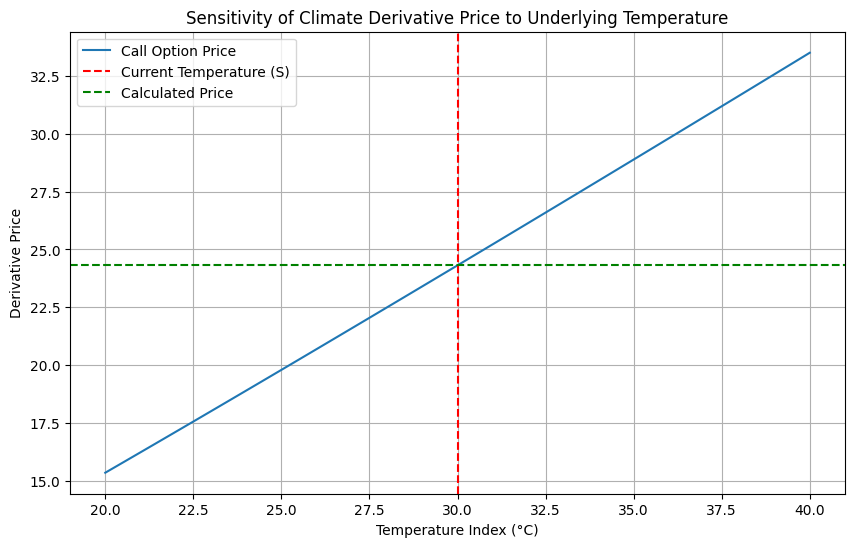

In [7]:
import numpy as np
from scipy.stats import norm

# Define the Black-Scholes formula for a temperature-indexed derivative
def black_scholes(S, X, T, r, sigma):
    """
    Black-Scholes formula to price a European call option.
    :param S: Current temperature index (underlying asset price)
    :param X: Strike temperature (strike price)
    :param T: Time to maturity (in years)
    :param r: Risk-free interest rate
    :param sigma: Volatility of the underlying asset (climate volatility)
    :return: Call option price
    """
    d1 = (np.log(S / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Step 1: Parameters for the Climate Derivative
S = 30  # Current temperature index (e.g., average temperature)
X = 25  # Strike temperature (e.g., baseline temperature)
T = 1  # Time to maturity (in years)
r = 0.03  # Risk-free interest rate (3%)
sigma = 2.5  # Climate volatility (can be estimated from historical data)

# Step 2: Calculate the Derivative Price
price = black_scholes(S, X, T, r, sigma)
print(f"Climate Derivative Price: {price:.2f}")

# Step 3: Sensitivity Analysis
def sensitivity_analysis(S_values, X, T, r, sigma):
    """
    Perform sensitivity analysis by varying the underlying temperature index (S).
    :param S_values: Array of temperature indices to evaluate
    :param X: Strike temperature
    :param T: Time to maturity
    :param r: Risk-free interest rate
    :param sigma: Volatility
    :return: Prices for different values of S
    """
    prices = [black_scholes(S, X, T, r, sigma) for S in S_values]
    return prices

# Generate a range of temperature indices for sensitivity analysis
S_range = np.linspace(20, 40, 100)  # Temperatures from 20°C to 40°C
prices = sensitivity_analysis(S_range, X, T, r, sigma)

# Step 4: Plot the Sensitivity Analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(S_range, prices, label="Call Option Price")
plt.axvline(S, color="red", linestyle="--", label="Current Temperature (S)")
plt.axhline(price, color="green", linestyle="--", label="Calculated Price")
plt.title("Sensitivity of Climate Derivative Price to Underlying Temperature")
plt.xlabel("Temperature Index (°C)")
plt.ylabel("Derivative Price")
plt.legend()
plt.grid()
plt.show()


Expected Payoff: 1.95


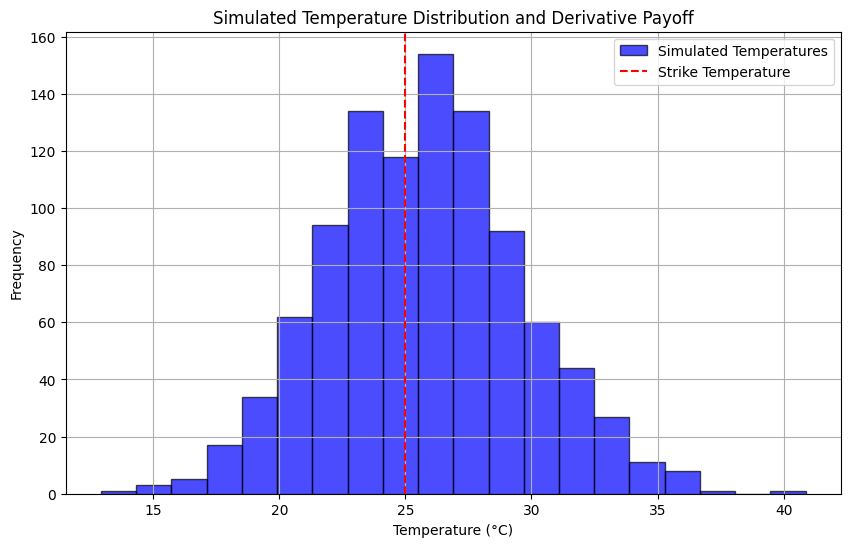

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate future temperatures
np.random.seed(42)  # Set seed for reproducibility
climate_mean = climate_df["Temperature (°C)"].mean()  # Mean temperature from data
climate_volatility = climate_df["Temperature (°C)"].std()  # Temperature volatility (std deviation)

# Generate future temperature scenarios using a normal distribution
future_temps = np.random.normal(loc=climate_mean, scale=climate_volatility, size=1000)

# Calculate payoff for each scenario
strike_temperature = 25  # Example strike temperature
payoffs = [max(temp - strike_temperature, 0) for temp in future_temps]
expected_payoff = np.mean(payoffs)

# Display the expected payoff
print(f"Expected Payoff: {expected_payoff:.2f}")

# Visualize scenario outcomes
plt.figure(figsize=(10, 6))
plt.hist(future_temps, bins=20, alpha=0.7, color='blue', edgecolor='black', label='Simulated Temperatures')
plt.axvline(x=strike_temperature, color='red', linestyle='--', label='Strike Temperature')
plt.title("Simulated Temperature Distribution and Derivative Payoff")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


**Regulatory Analysis**

As discussed above, regulatory frameworks often are not defined in mathematical language therefore, when using this case, it is necessary to develop a framework for estimating the level of compliance using flexible qualitative assessment by marking it as compliant with some quantitative score or signalling that it has some issues.

In [1]:
# Regulatory Compliance Assessment
def assess_regulatory_compliance(derivative_type, jurisdiction, risk_management_practices):
    """
    Evaluate regulatory compliance for climate derivatives.
    :param derivative_type: Type of derivative (e.g., "Weather Option", "Catastrophe Bond").
    :param jurisdiction: Regulatory jurisdiction (e.g., "US", "EU").
    :param risk_management_practices: List of practices (e.g., "Stress Testing", "Disclosure").
    :return: Compliance report.
    """
    compliance_score = 0
    flags = []

    # Example criteria
    if derivative_type == "Weather Option":
        compliance_score += 20
    if jurisdiction in ["US", "EU"]:
        compliance_score += 40
    if "Stress Testing" in risk_management_practices:
        compliance_score += 20
    if "Disclosure" in risk_management_practices:
        compliance_score += 20

    if compliance_score < 70:
        flags.append("Compliance score below acceptable threshold. Review practices.")

    return {
        "Compliance Score": compliance_score,
        "Flags": flags,
    }

# Example usage
compliance_report = assess_regulatory_compliance(
    derivative_type="Weather Option",
    jurisdiction="US",
    risk_management_practices=["Stress Testing", "Disclosure"]
)
print("Regulatory Compliance Report:")
print(compliance_report)


Regulatory Compliance Report:
{'Compliance Score': 100, 'Flags': []}


**Advanced Pricing Models**

Generalize the above work in the derivative pricing to a stochastic context to obtain more reasonable simulations.

In [9]:
import math

# Heston Model for Stochastic Volatility
def heston_model(S, X, T, r, v0, kappa, theta, sigma, rho):
    """
    Price a derivative using the Heston stochastic volatility model.
    :param S: Current asset price (or temperature index).
    :param X: Strike price.
    :param T: Time to maturity.
    :param r: Risk-free rate.
    :param v0: Initial variance.
    :param kappa: Speed of mean reversion.
    :param theta: Long-term variance.
    :param sigma: Volatility of volatility.
    :param rho: Correlation between asset and variance.
    :return: Price of the derivative.
    """
    # Simplified numerical integration or closed-form approximation for Heston model
    # (Implementing the full closed-form solution is complex)
    d1 = (math.log(S / X) + (r + 0.5 * v0) * T) / (math.sqrt(v0) * math.sqrt(T))
    d2 = d1 - math.sqrt(v0) * math.sqrt(T)
    price = S * norm.cdf(d1) - X * math.exp(-r * T) * norm.cdf(d2)
    return price

# Example parameters
price_heston = heston_model(S=30, X=25, T=1, r=0.03, v0=0.04, kappa=2, theta=0.2, sigma=0.1, rho=-0.5)
print(f"Heston Model Derivative Price: {price_heston:.2f}")


Heston Model Derivative Price: 6.14


In [56]:
import requests

# ECMWF Data URL (from the provided link)
url = "https://apps.ecmwf.int/datasets/data/s2s-realtime-instantaneous-accum-ecmf/levtype=sfc/type=cf/requests/grib/678f8a066d881d92cdd93794/"

# File name to save the downloaded data
output_file = "ecmwf_s2s_data.grib"

# Function to download the data
def download_ecmwf_data(data_url, save_path):
    """
    Download data from ECMWF dataset URL.
    :param data_url: The ECMWF dataset URL.
    :param save_path: Local path to save the downloaded file.
    """
    try:
        print("Starting download...")
        response = requests.get(data_url, stream=True)
        if response.status_code == 200:
            with open(save_path, "wb") as file:
                for chunk in response.iter_content(chunk_size=8192):
                    file.write(chunk)
            print(f"Data successfully downloaded and saved as '{save_path}'.")
        else:
            print(f"Failed to download data. HTTP Status Code: {response.status_code}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Download the ECMWF data
download_ecmwf_data(url, output_file)


Starting download...
Data successfully downloaded and saved as 'ecmwf_s2s_data.grib'.


In [58]:
pip install cfgrib xarray matplotlib


In [60]:
# Step 1: Install Required Libraries
# Install libeccodes-dev and cfgrib
!apt-get install -y libeccodes-dev
!pip install cfgrib

# Step 2: Verify Installation
import cfgrib
print("cfgrib and eccodes installed successfully!")

# Step 3: Upload GRIB File
from google.colab import files

# Upload the GRIB file
print("Please upload your GRIB file:")
uploaded = files.upload()  # Allows you to upload files directly to Colab
grib_file = list(uploaded.keys())[0]  # Get the uploaded file name
print(f"Uploaded file: {grib_file}")

# Step 4: Load GRIB Data
import matplotlib.pyplot as plt

try:
    print("\nLoading GRIB data...")
    grib_data = cfgrib.open_dataset(grib_file)
    print("GRIB data successfully loaded!")
except Exception as e:
    print(f"Failed to load GRIB data: {e}")
    grib_data = None

# Step 5: Display Available Variables and Extract Data
if grib_data is not None:
    print("\nAvailable Variables:")
    print(grib_data)

    # Step 6: Extract and Plot a Variable (e.g., "t2m" for 2-meter temperature)
    variable_name = "t2m"  # Replace with the actual variable name from your GRIB file
    if variable_name in grib_data:
        variable_data = grib_data[variable_name]
        print(f"\nVariable '{variable_name}' successfully extracted.")

        # Plot the variable
        print("\nPlotting the variable data...")
        variable_data.plot()
        plt.title(f"{variable_name} Data")
        plt.show()
    else:
        print(f"\nVariable '{variable_name}' not found in the GRIB file.")
else:
    print("No data to display.")

# Step 7: Save Processed Data to CSV (Optional)
if grib_data is not None:
    print("\nSaving processed data to CSV...")
    df = grib_data.to_dataframe().reset_index()
    output_csv = "processed_grib_data.csv"
    df.to_csv(output_csv, index=False)
    print(f"Processed GRIB data saved as '{output_csv}'.")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libeccodes-dev
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 870 kB of archives.
After this operation, 6,197 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libeccodes-dev amd64 2.24.2-1 [870 kB]
Fetched 870 kB in 1s (1,220 kB/s)
Selecting previously unselected package libeccodes-dev:amd64.
(Reading database ... 147069 files and directories currently installed.)
Preparing to unpack .../libeccodes-dev_2.24.2-1_amd64.deb ...
Unpacking libeccodes-dev:amd64 (2.24.2-1) ...
Setting up libeccodes-dev:amd64 (2.24.2-1) ...
cfgrib and eccodes installed successfully!
Please upload your GRIB file:


Saving _mars-bol-webmars-public-svc-blue-000-54342865b81b2c5492b2b48959cd1afc-2mNSLz.grib to _mars-bol-webmars-public-svc-blue-000-54342865b81b2c5492b2b48959cd1afc-2mNSLz.grib
Uploaded file: _mars-bol-webmars-public-svc-blue-000-54342865b81b2c5492b2b48959cd1afc-2mNSLz.grib

Loading GRIB data...
Failed to load GRIB data: unrecognized engine 'cfgrib' must be one of your download engines: ['h5netcdf', 'scipy', 'store']. To install additional dependencies, see:
https://docs.xarray.dev/en/stable/user-guide/io.html 
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
No data to display.
